In [1]:
HEIGHT = 128
WIDTH = 128
EPOCHS = 10
BATCH_SIZE = 16
TRAIN_CSV = "./datasets/data/nyu2_train.csv"

In [2]:
import numpy as np
import tensorflow as tf
from segmentation_models import Unet

%run utils/datasets.ipynb

%run utils/utils.ipynb

Segmentation Models: using `keras` framework.


In [3]:
partition, labels = load_train_csv(TRAIN_CSV)

In [4]:
partition['train'] = partition['train'][:20000]
partition['validation'] = partition['validation'][:5000]

In [5]:
print(len(partition['train']), len(partition['validation']))

20000 5000


In [6]:
training_generator = DataGenerator(list_IDs=partition['train'], labels=labels, batch_size=BATCH_SIZE,
                                   dim=(HEIGHT, WIDTH), n_channels=3, shuffle=True, pred=False)
validation_generator = DataGenerator(list_IDs=partition['validation'], labels=labels, batch_size=BATCH_SIZE,
                                     dim=(HEIGHT, WIDTH), n_channels=3, shuffle=True, pred=False)

In [7]:
model = Unet("resnet34", input_shape=(HEIGHT,WIDTH,3), encoder_weights="imagenet", encoder_freeze=False)

In [8]:
# model.summary()

In [9]:
model.compile(optimizer=opt,
              loss=lambda y_true, y_pred : gen_depth_loss(y_true, y_pred, (1.0, 3.0, 0.1)),
              metrics=[depth_acc])

In [10]:
r = model.fit(training_generator, validation_data=validation_generator, epochs=EPOCHS)

Epoch 1/10
1250/1250 [==============================] - 275s 214ms/step - loss: 0.2550 - depth_acc: 0.7386 - val_loss: 0.2119 - val_depth_acc: 0.8477
Epoch 2/10
1250/1250 [==============================] - 192s 154ms/step - loss: 0.1962 - depth_acc: 0.8701 - val_loss: 0.1831 - val_depth_acc: 0.8877
Epoch 3/10
1250/1250 [==============================] - 187s 150ms/step - loss: 0.1782 - depth_acc: 0.8938 - val_loss: 0.1699 - val_depth_acc: 0.9088
Epoch 4/10
1250/1250 [==============================] - 187s 150ms/step - loss: 0.1667 - depth_acc: 0.9060 - val_loss: 0.1608 - val_depth_acc: 0.9182
Epoch 5/10
1250/1250 [==============================] - 187s 149ms/step - loss: 0.1584 - depth_acc: 0.9143 - val_loss: 0.1544 - val_depth_acc: 0.9219
Epoch 6/10
1250/1250 [==============================] - 186s 149ms/step - loss: 0.1515 - depth_acc: 0.9209 - val_loss: 0.1501 - val_depth_acc: 0.9256
Epoch 7/10
1250/1250 [==============================] - 186s 149ms/step - loss: 0.1462 - depth_acc: 

In [11]:
print(r.history)

{'loss': [0.2549678087234497, 0.19616904854774475, 0.1781703531742096, 0.1666678488254547, 0.15839523077011108, 0.15152572095394135, 0.1462053507566452, 0.14145967364311218, 0.13749539852142334, 0.13393276929855347], 'depth_acc': [0.7386415600776672, 0.8701061606407166, 0.893808126449585, 0.9060491919517517, 0.9143210649490356, 0.920876681804657, 0.9261607527732849, 0.9303032159805298, 0.9344222545623779, 0.9379098415374756], 'val_loss': [0.21193785965442657, 0.18308672308921814, 0.1699238419532776, 0.160835400223732, 0.15442641079425812, 0.15011046826839447, 0.14491437375545502, 0.14050254225730896, 0.13787300884723663, 0.13480845093727112], 'val_depth_acc': [0.847682535648346, 0.8877378702163696, 0.9087596535682678, 0.9182291030883789, 0.9218677878379822, 0.9256230592727661, 0.9312521815299988, 0.934353768825531, 0.9362775087356567, 0.9398173093795776]}


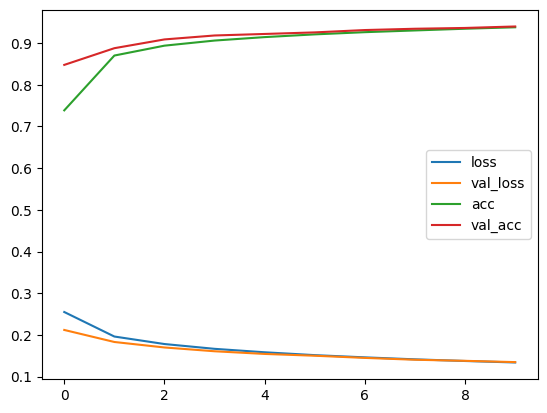

In [12]:
plot_history(r.history)

In [13]:
print(save_model('resnet', model))

model_resnet_1708450819.keras
